#Q1
There are several types of clustering algorithms, each with its own approach and underlying assumptions. Some common types of clustering algorithms include:

K-Means Clustering:

Approach: Partition data into K clusters where each data point belongs to the cluster with the nearest mean.

Assumption: Assumes spherical-shaped clusters and an equal variance within each cluster.

Use Case: Customer segmentation based on purchase behavior.

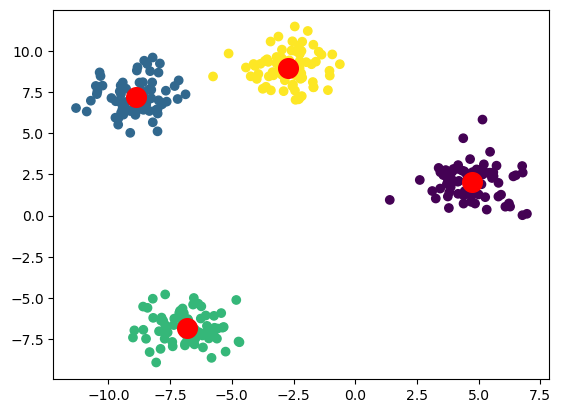

In [3]:
#1 
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
# Generate synthetic data
X, _ = make_blobs(n_samples=300, centers=4, random_state=42)

# Apply K-Means clustering
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(X)

# Visualize the clusters
plt.scatter(X[:, 0], X[:, 1], c=kmeans.labels_, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, color='red')
plt.show()

#1
Hierarchical Clustering:

Approach: Build a hierarchy of clusters by recursively merging or splitting existing clusters.

Assumption: No explicit assumption about cluster shapes.

Use Case: Taxonomy construction or biological clustering.

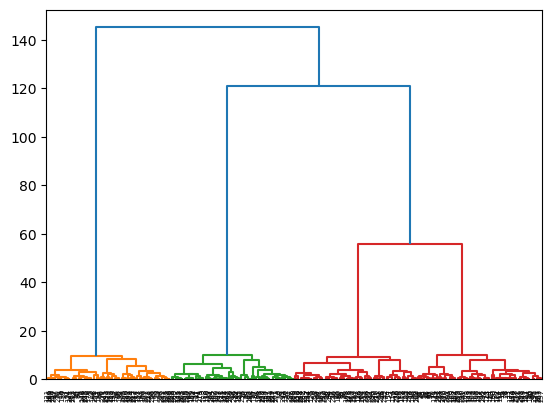

In [4]:
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

# Generate synthetic data
X, _ = make_blobs(n_samples=300, centers=4, random_state=42)

# Apply Hierarchical clustering
linkage_matrix = linkage(X, 'ward')
dendrogram(linkage_matrix)
plt.show()

#1
DBSCAN (Density-Based Spatial Clustering of Applications with Noise):

Approach: Clusters dense regions and marks data points in less dense regions as outliers.

Assumption: Assumes clusters as dense areas separated by sparser areas.

Use Case: Anomaly detection or identifying spatial clusters

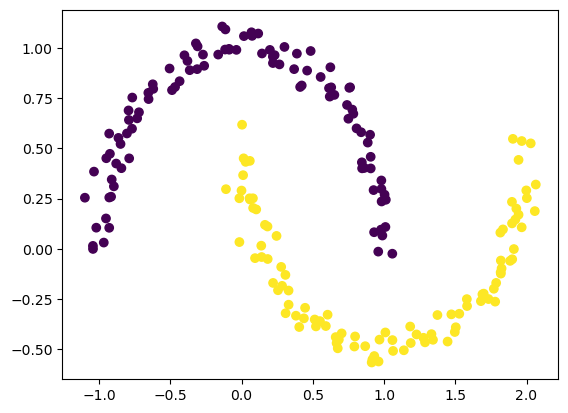

In [6]:
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt

# Generate synthetic data
X, _ = make_moons(n_samples=200, noise=0.05, random_state=42)

# Apply DBSCAN clustering
dbscan = DBSCAN(eps=0.3, min_samples=5)
dbscan.fit(X)

# Visualize the clusters
plt.scatter(X[:, 0], X[:, 1], c=dbscan.labels_, cmap='viridis')
plt.show()

#Q2

K-Means Clustering:

K-Means is a popular unsupervised machine learning algorithm used for clustering. The goal of K-Means is to partition a dataset into K clusters, where each data point belongs to the cluster with the nearest mean. It works iteratively by assigning data points to the nearest cluster and then updating the cluster centroids based on the mean of the assigned points.

How K-Means Works:

Initialization:
Choose the number of clusters, K.
Randomly initialize K cluster centroids.

Assignment Step:
Assign each data point to the cluster whose centroid is the nearest.

Update Step:
Update each cluster centroid by computing the mean of all data points assigned to that cluster.

Repeat:
Repeat steps 2 and 3 until convergence (when the assignments no longer change significantly).

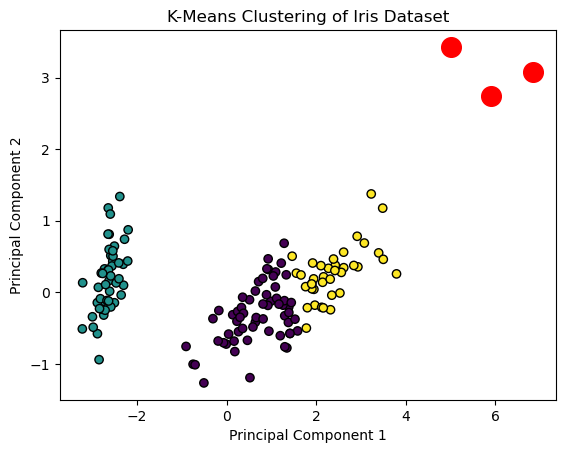

In [8]:
#2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Apply K-Means clustering (assuming 3 clusters for the 3 species)
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)

# Reduce the data to 2D for visualization using PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Visualize the clusters
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans.labels_, cmap='viridis', edgecolors='k')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, color='red')
plt.title('K-Means Clustering of Iris Dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

#Q3

#Advantages of K-Means Clustering:

Simplicity and Efficiency:
K-Means is simple to implement and computationally efficient, making it suitable for large datasets.

Scalability:
It scales well with the number of data points, making it applicable to large datasets.

Convergence:
K-Means usually converges quickly, making it a practical choice for clustering tasks.

Interpretability:
The results of K-Means are easy to interpret, and the algorithm is intuitive to understand.

#Limitations of K-Means Clustering:

Sensitive to Initial Centroid Positions:
K-Means is sensitive to the initial placement of cluster centroids, and different initializations may lead to different results.

Assumption of Spherical Clusters:
K-Means assumes that clusters are spherical and equally sized, which may not be suitable for all types of data.

Requires Predefined Number of Clusters (K):
The algorithm requires specifying the number of clusters in advance, which may not be known in real-world scenarios.

Sensitive to Outliers:
K-Means is sensitive to outliers, and the presence of outliers can significantly impact cluster assignments.

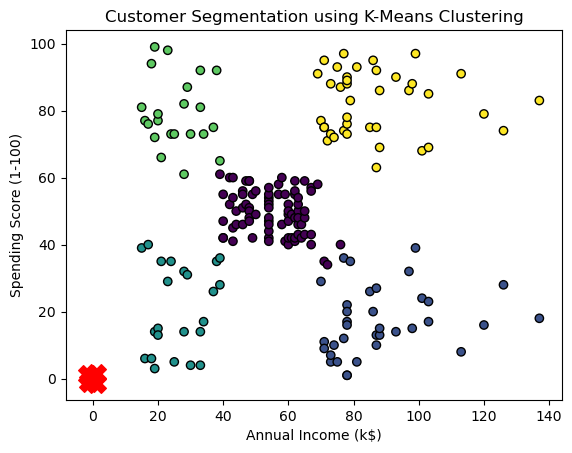

In [11]:
#3
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Load the Mall Customer Segmentation dataset
mall_data = pd.read_csv('Mall_Customers.csv')

# Extract relevant features
X = mall_data[['Annual Income (k$)', 'Spending Score (1-100)']]

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply K-Means clustering
kmeans = KMeans(n_clusters=5, random_state=42)
mall_data['Cluster'] = kmeans.fit_predict(X_scaled)

# Visualize the clusters
plt.scatter(X['Annual Income (k$)'], X['Spending Score (1-100)'], c=mall_data['Cluster'], cmap='viridis', edgecolors='k')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='X', s=200, color='red')
plt.title('Customer Segmentation using K-Means Clustering')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()

#Q4
The optimal number of clusters in K-Means clustering is a crucial step, and there are several methods to find the optimal value for K. Some common methods include:

Elbow Method:
The Elbow Method involves running K-Means clustering on the dataset for a range of values of K and plotting the within-cluster sum of squares (WCSS) against the number of clusters. The "elbow" of the curve is a point where the rate of decrease in WCSS sharply changes, indicating an optimal number of clusters.

Silhouette Score:
The Silhouette Score measures how similar an object is to its own cluster (cohesion) compared to other clusters (separation). The score ranges from -1 to 1, and a higher silhouette score indicates a better-defined cluster. The optimal number of clusters is where the silhouette score is maximized.

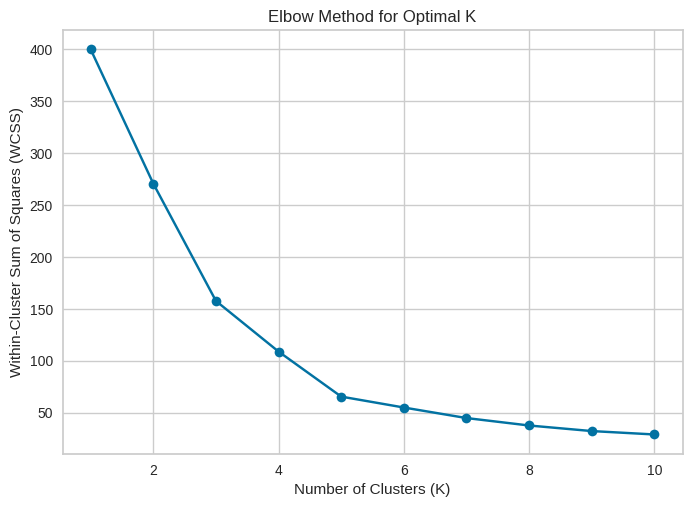

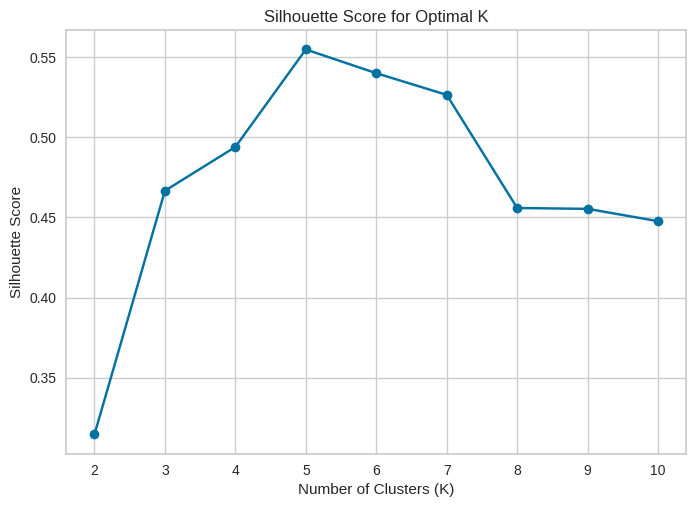

In [16]:
#4
#applying the Elbow Method and Silhouette Score to find the optimal number of clusters.

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import KElbowVisualizer

# Load the Mall Customer Segmentation dataset
mall_data = pd.read_csv('Mall_Customers.csv')

# Extract relevant features
X = mall_data[['Annual Income (k$)', 'Spending Score (1-100)']]

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Elbow Method
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Plot the Elbow Method
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.show()

# Silhouette Score
silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    silhouette_scores.append(silhouette_score(X_scaled, kmeans.labels_))

# Plot Silhouette Score
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.title('Silhouette Score for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.show()

#Q5
Application 1: Customer Segmentation

Problem: Companies use K-Means to segment customers based on purchasing behavior, enabling targeted marketing strategies.

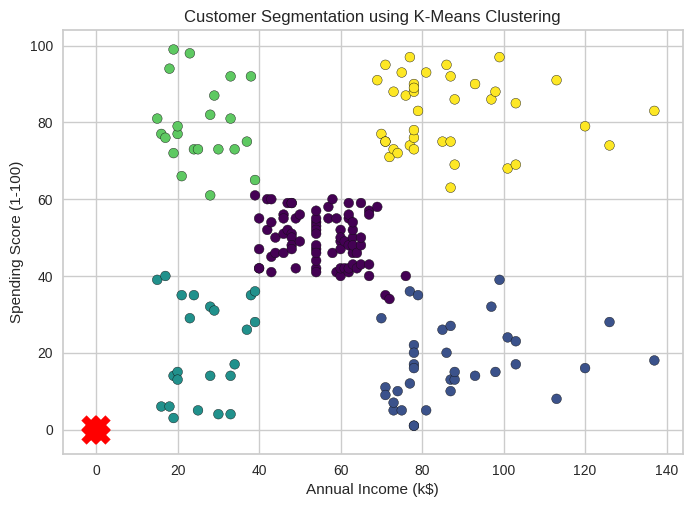

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Load the Mall Customer Segmentation dataset
mall_data = pd.read_csv('Mall_Customers.csv')

# Extract relevant features
X = mall_data[['Annual Income (k$)', 'Spending Score (1-100)']]

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply K-Means clustering
kmeans = KMeans(n_clusters=5, random_state=42)
mall_data['Cluster'] = kmeans.fit_predict(X_scaled)

# Visualize the clusters
plt.scatter(X['Annual Income (k$)'], X['Spending Score (1-100)'], c=mall_data['Cluster'], cmap='viridis', edgecolors='k')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='X', s=200, color='red')
plt.title('Customer Segmentation using K-Means Clustering')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()

Application 2: Image Compression

Problem: K-Means can be used to compress images by reducing the number of colors while preserving the image's overall structure

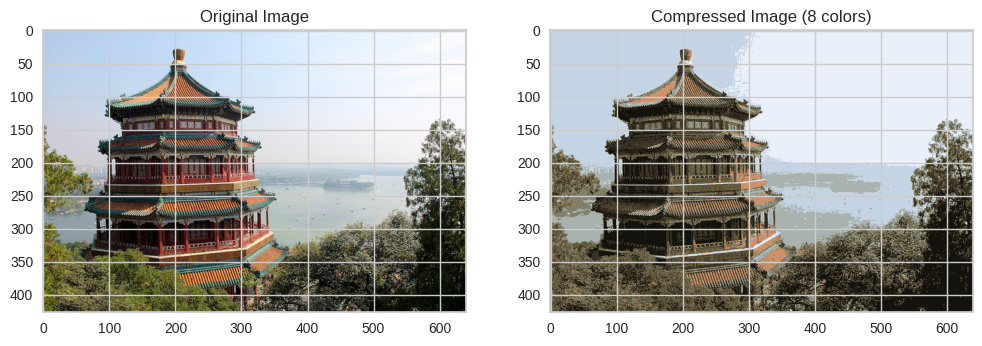

In [18]:
from sklearn.cluster import KMeans
from sklearn.datasets import load_sample_image
import matplotlib.pyplot as plt

# Load a sample image
china = load_sample_image("china.jpg")
data = china / 255.0  # Normalize pixel values to the range [0, 1]

# Reshape the image to be a list of pixels
pixels = data.reshape((-1, 3))

# Apply K-Means clustering for color quantization
kmeans = KMeans(n_clusters=8, random_state=42)
kmeans.fit(pixels)
quantized_colors = kmeans.cluster_centers_
labels = kmeans.labels_
compressed_image = quantized_colors[labels].reshape(china.shape)

# Display the original and compressed images
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(china)

plt.subplot(1, 2, 2)
plt.title('Compressed Image (8 colors)')
plt.imshow(compressed_image)

plt.show()

#Q6
Once K-Means clustering is applied, you can interpret the output using the cluster labels and centroids.

In [19]:
#6

# Access cluster labels and centroids
cluster_labels = kmeans.labels_
centroids = kmeans.cluster_centers_

# Print the cluster labels assigned to each data point
print("Cluster Labels:", cluster_labels)

# Print the coordinates of cluster centroids
print("Cluster Centroids:", centroids)


Cluster Labels: [3 3 3 ... 7 4 4]
Cluster Centroids: [[0.91644741 0.94292912 0.97718484]
 [0.39057014 0.34870172 0.23217015]
 [0.81239331 0.57061961 0.41226142]
 [0.77525091 0.83441816 0.89744915]
 [0.08193859 0.07217655 0.04720542]
 [0.66260617 0.69884309 0.68458081]
 [0.5087488  0.4999897  0.40606295]
 [0.22652448 0.20037701 0.14761844]]


In [ ]:
Insights:

Each data point is assigned to a specific cluster, and you can analyze the distribution of data points among clusters.

The centroids represent the mean coordinates of data points in each cluster, providing a summary of the cluster's characteristics.